#### McKenzie Steenson
#### CS 334
#### HW4

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from math import exp

In [50]:
df = pd.read_csv('weather.csv')

df.head(5)

,STATION,NAME,DATE,Avg Daily Wind Speed,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT08
0,USW00024131,"BOISE AIR TERMINAL, ID US",3/21/2020,6.04,NaN,NaN,NaN,0.00,0.0,0.0,...,320.0,340.0,16.1,21.9,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024131,"BOISE AIR TERMINAL, ID US",3/22/2020,5.82,NaN,NaN,NaN,0.00,0.0,0.0,...,360.0,360.0,15.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024131,"BOISE AIR TERMINAL, ID US",3/23/2020,9.62,NaN,NaN,NaN,0.05,0.0,0.0,...,280.0,270.0,29.1,38.0,NaN,NaN,NaN,NaN,NaN,1.0
3,USW00024131,"BOISE AIR TERMINAL, ID US",3/24/2020,6.71,NaN,NaN,NaN,0.07,0.0,0.0,...,290.0,300.0,21.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00024131,"BOISE AIR TERMINAL, ID US",3/25/2020,7.83,NaN,NaN,NaN,0.01,0.0,0.0,...,310.0,310.0,21.0,29.1,1.0,NaN,NaN,NaN,NaN,NaN


In [51]:
# DAPR, MDPR, PGTM, SNWD and TOBS-WT08 columns to be dropped!
df = df.drop(['DAPR', 'MDPR', 'PGTM', 'SNWD'], axis=1)
df = df.drop(df.loc[:, 'TOBS':'WT08'].columns, axis=1)

In [52]:
# The data has plenty of duplicates, must remove those too!
df = df.drop(df.index[541:9716])

In [53]:
df

,STATION,NAME,DATE,Avg Daily Wind Speed,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00024131,"BOISE AIR TERMINAL, ID US",3/21/2020,6.04,0.00,0.0,48.0,59.0,36.0
1,USW00024131,"BOISE AIR TERMINAL, ID US",3/22/2020,5.82,0.00,0.0,46.0,60.0,33.0
2,USW00024131,"BOISE AIR TERMINAL, ID US",3/23/2020,9.62,0.05,0.0,50.0,57.0,43.0
3,USW00024131,"BOISE AIR TERMINAL, ID US",3/24/2020,6.71,0.07,0.0,45.0,49.0,36.0
4,USW00024131,"BOISE AIR TERMINAL, ID US",3/25/2020,7.83,0.01,0.0,40.0,49.0,32.0
...,...,...,...,...,...,...,...,...,...
537,USW00024131,"BOISE AIR TERMINAL, ID US",9/9/2021,6.26,0.00,0.0,78.0,98.0,64.0
538,USW00024131,"BOISE AIR TERMINAL, ID US",9/10/2021,6.71,0.11,0.0,76.0,78.0,55.0
539,USW00024131,"BOISE AIR TERMINAL, ID US",9/11/2021,NaN,NaN,NaN,62.0,NaN,NaN
540,US1IDAD0021,"BOISE CITY 6.1 SE, ID US",3/21/2020,NaN,0.00,0.0,NaN,NaN,NaN


In [54]:
# Change the string dates ('3/21/2020') into datetime objects!
def string_to_date(date_string):
    return datetime.strptime(date_string,'%m/%d/%Y')

In [65]:
df['DATE'] = df['DATE'].apply(string_to_date)

In [66]:
# Add a column indicating if there was percipitation that day! (0 = no rain, 1 = rain)
df['RAIN'] = ""
df.loc[df['PRCP'] == 0.00, "RAIN"] = 0
df.loc[df['PRCP'] > 0.00, "RAIN"] = 1

In [67]:
df

,STATION,NAME,DATE,Avg Daily Wind Speed,PRCP,SNOW,TAVG,TMAX,TMIN,RAIN
0,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-21,6.040000,0.000000,0.000000,48.000000,59.000000,36.000000,0
1,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-22,5.820000,0.000000,0.000000,46.000000,60.000000,33.000000,0
2,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-23,9.620000,0.050000,0.000000,50.000000,57.000000,43.000000,1
3,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-24,6.710000,0.070000,0.000000,45.000000,49.000000,36.000000,1
4,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-25,7.830000,0.010000,0.000000,40.000000,49.000000,32.000000,1
...,...,...,...,...,...,...,...,...,...,...
537,USW00024131,"BOISE AIR TERMINAL, ID US",2021-09-09,6.260000,0.000000,0.000000,78.000000,98.000000,64.000000,0
538,USW00024131,"BOISE AIR TERMINAL, ID US",2021-09-10,6.710000,0.110000,0.000000,76.000000,78.000000,55.000000,1
539,USW00024131,"BOISE AIR TERMINAL, ID US",2021-09-11,7.509369,0.032625,0.039259,62.000000,70.606679,45.959184,1
540,US1IDAD0021,"BOISE CITY 6.1 SE, ID US",2020-03-21,7.509369,0.000000,0.000000,58.155556,70.606679,45.959184,0


In [68]:
# Fill NaN values
df.fillna(df.mean(), inplace=True)

C:\Users\mcken\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


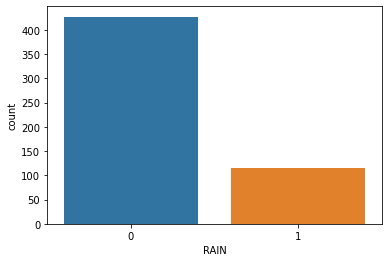

In [69]:
ax = sns.countplot(x="RAIN", data=df) # Rain vs No Rain (lots of days in Boise without Rain)

In [87]:
feature_cols = ['Avg Daily Wind Speed', 'SNOW', 'TAVG','TMAX','TMIN']
X = df[feature_cols] # Features
y = df['RAIN'] # Target variable

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [89]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [90]:
X_test.head(15)

,Avg Daily Wind Speed,SNOW,TAVG,TMAX,TMIN
6,6.04,0.0,38.0,50.0,26.0
47,5.82,0.0,51.0,66.0,34.0
336,8.50,0.2,35.0,41.0,30.0
392,6.49,0.0,53.0,67.0,39.0
213,5.82,0.0,54.0,62.0,45.0
39,9.40,0.0,66.0,88.0,53.0
200,4.47,0.0,65.0,82.0,50.0
305,5.37,0.0,31.0,44.0,23.0
274,10.07,0.0,42.0,46.0,39.0
442,9.62,0.0,65.0,77.0,49.0


In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9338235294117647


[]

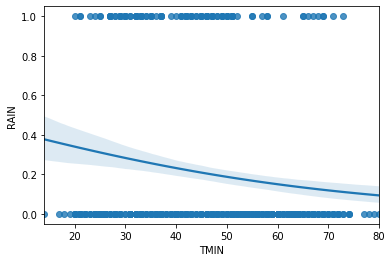

In [92]:
sns.regplot(x = "TMIN", y = "RAIN", data=df, logistic = True)
plt.plot()

Text(0.5, 0, 'Importance')

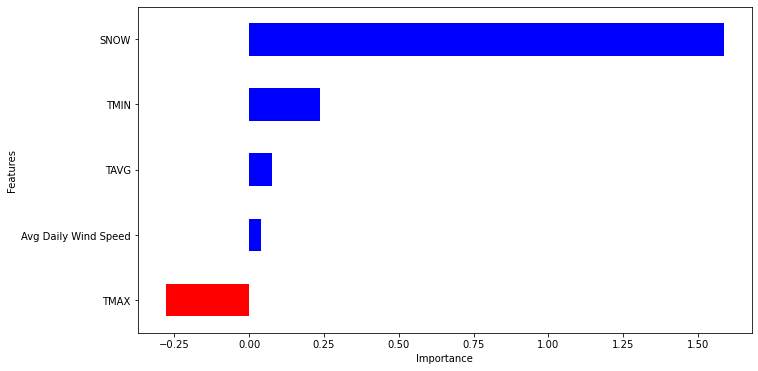

In [93]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [96]:
# [['Avg Daily Wind Speed', 'SNOW', 'TAVG','TMAX','TMIN']]
# a new prediction!
new_day = [['10.20', '0.00', '42.0','50.0','32.0']]

In [97]:
prediction = logreg.predict(new_day)

C:\Users\mcken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [98]:
prediction[0]

0

In [100]:
# a new prediction, but with more snow?
new_day = [['10.20', '2.5', '22.0','50.0','32.0']]
prediction = logreg.predict(new_day)
prediction[0]

C:\Users\mcken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


1

### My model does seem to be better than a wild guess!Snow, wind speed, and the minimum daily temperature are the most influential indicators of wether or not it will rain on any given day in Boise. As the temperature increases, indicated by the TMAX, it indicates that as a negative influencer on percipitation on any day. My model recieved an accuracy score of 93%, which is surprisingly high when considering only snow, temperatures, and wind speeds.